## **Scanpy Host-Microbiome data**

### **CHIP B04101E5**

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(123)
np.random.seed(123)

import os
import sys
sys.path.insert(0, "/scratch_isilon/groups/singlecell/data/STEREOSEQ_RAW/Stereoseq_analysis/scripts/segmentation_based")

from custom_functions import spatialDensityFeaturePlot, spatialFeaturePlot, spatialClonePlot

In [3]:
print("scanpy:", sc.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", matplotlib.__version__)
print(sys.version)

scanpy: 1.9.8
numpy: 1.23.5
pandas: 1.5.3
seaborn: 0.13.2
matplotlib: 3.7.1
3.8.20 (default, Oct  3 2024, 15:24:27) 
[GCC 11.2.0]


In [4]:
%load_ext autoreload
%autoreload 2

### **Loading data**

In [5]:
hdata = sc.read_h5ad("/home/groups/singlecell/cfernandez/test_B04101E5_75binS.h5ad")
hdata

AnnData object with n_obs × n_vars = 55769 × 29758
    obs: 'orig.ident', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'underTissue', 'keep'
    var: 'mito', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'binSize', 'bin_size', 'bin_type', 'description', 'orig_var_names', 'resolution', 'sn', 'spatial'
    obsm: 'spatial'

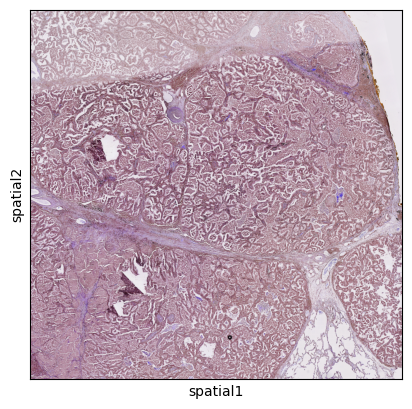

In [6]:
sc.pl.spatial(hdata, img_key='HeElowRes', spot_size=1, alpha=1)

In [7]:
print(f'Bin size 75 loaded. Format: {hdata.shape}')

# Make the list for the metrices
spots = []
genes = []
median_total_counts = []
median_n_genes_by_counts = []

# Number of spots and genes
spots.append(hdata.n_obs)
genes.append(hdata.n_vars)

# Medians
median_total_counts.append(hdata.obs['total_counts'].median())
median_n_genes_by_counts.append(hdata.obs['n_genes_by_counts'].median())

# DataFrame
summary_df = pd.DataFrame({
    'Bin size': ['75'],
    'Total spots': spots,
    'Total genes': genes,
    'Median counts': median_total_counts,
    'Median genes': median_n_genes_by_counts})

summary_df

Bin size 75 loaded. Format: (55769, 29758)


Bin size  Total spots  Total genes  Median counts  Median genes
0       75        55769        29758          902.0         619.0

In [8]:
total_counts = hdata.obs['total_counts']
n_above_1981 = np.sum(total_counts > 1981)
print(f"cells with total_counts > 1981: {n_above_1981}")

percentage = (n_above_1981 / len(total_counts)) * 100
print(f"represents {percentage:.2f}% of total cells")

high_counts = total_counts[total_counts > 1981]
print(high_counts)

cells with total_counts > 1981: 56
represents 0.10% of total cells
40587440956725    14078
50251117378650    38476
51861730114125     2378
65712999645450     2120
67323612383775     2097
67967857476225     2021
68934225121050     1996
69578470215075     2290
69900592762050     2051
70222715308800     2082
70544837854500     2127
70866960401925     2014
71511205497225     2148
71511205497300     2197
71833328044425     2000
71833328044500     2097
75054553516350     2061
79564269176700     2380
79886391723750     2385
79886391723825     2097
79886391723900     2320
80208514271025     2134
80208514271100     2016
80530636817550     1995
80530636817625     1983
80530636818750     2420
80530636818975     2253
80530636819050     2092
80852759364300     2075
80852759364375     1994
80852759365875     2250
80852759365950     2141
81174881912625     2100
81174881913075     2210
81174881913150     2165
81174881913675     2113
81497004459150     2309
81497004459975     2028
81497004460050     20

### **Visualization**

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

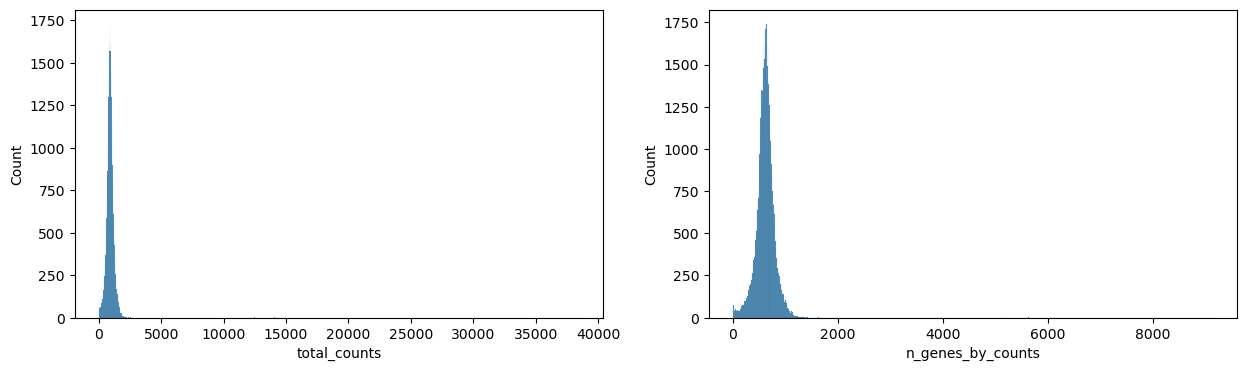

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(hdata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(hdata.obs["n_genes_by_counts"], kde=False, ax=axs[1])

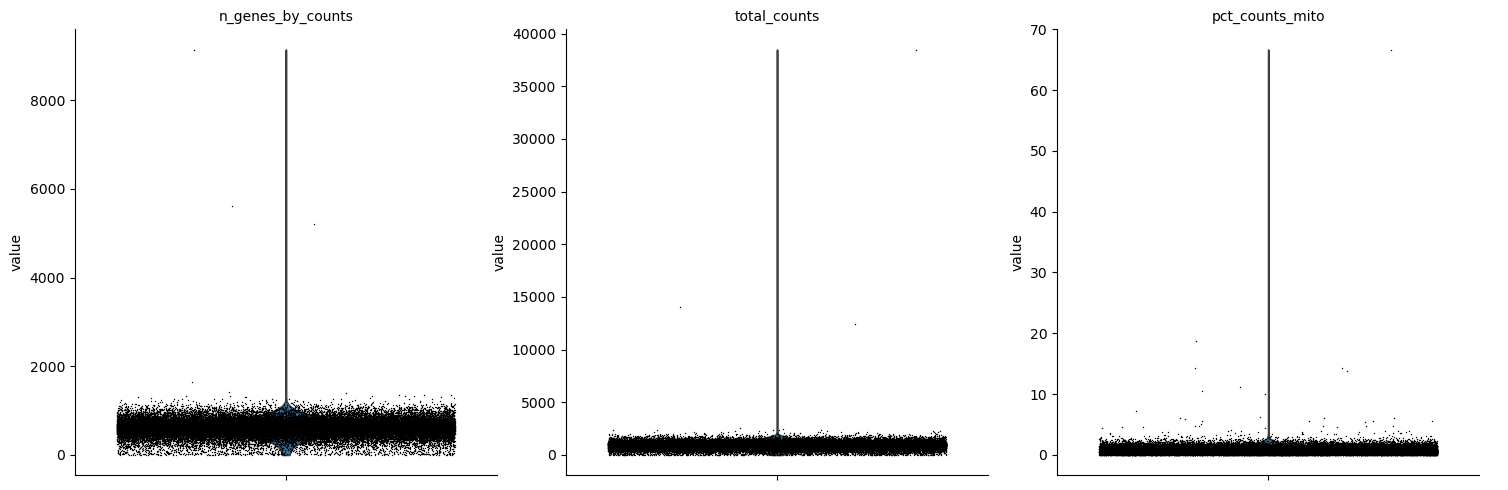

In [10]:
sc.pl.violin(
    hdata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mito"],
    jitter=0.4,
    multi_panel=True,)

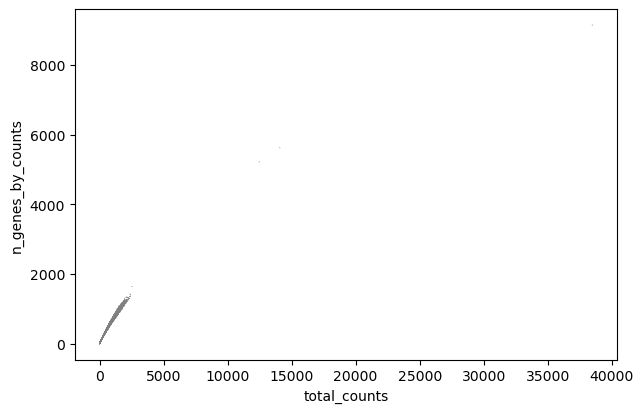

In [11]:
sc.pl.scatter(hdata, "total_counts", "n_genes_by_counts")

In [12]:
sc.pp.filter_cells(hdata, max_counts=2535) # removing last 3 spots with really high total counts

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

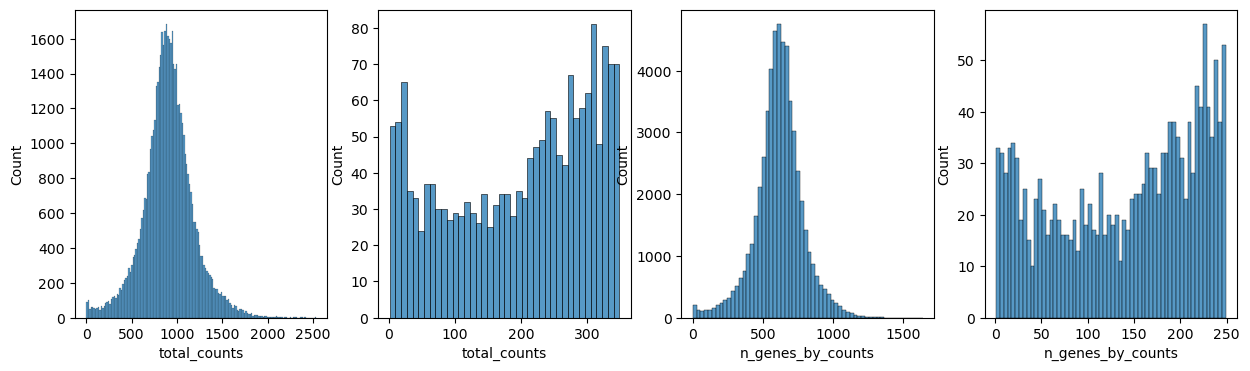

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(hdata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    hdata.obs["total_counts"][hdata.obs["total_counts"] < 350],
    kde=False,
    bins=40,
    ax=axs[1],)

sns.histplot(hdata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    hdata.obs["n_genes_by_counts"][hdata.obs["n_genes_by_counts"] < 250],
    kde=False,
    bins=60,
    ax=axs[3],)

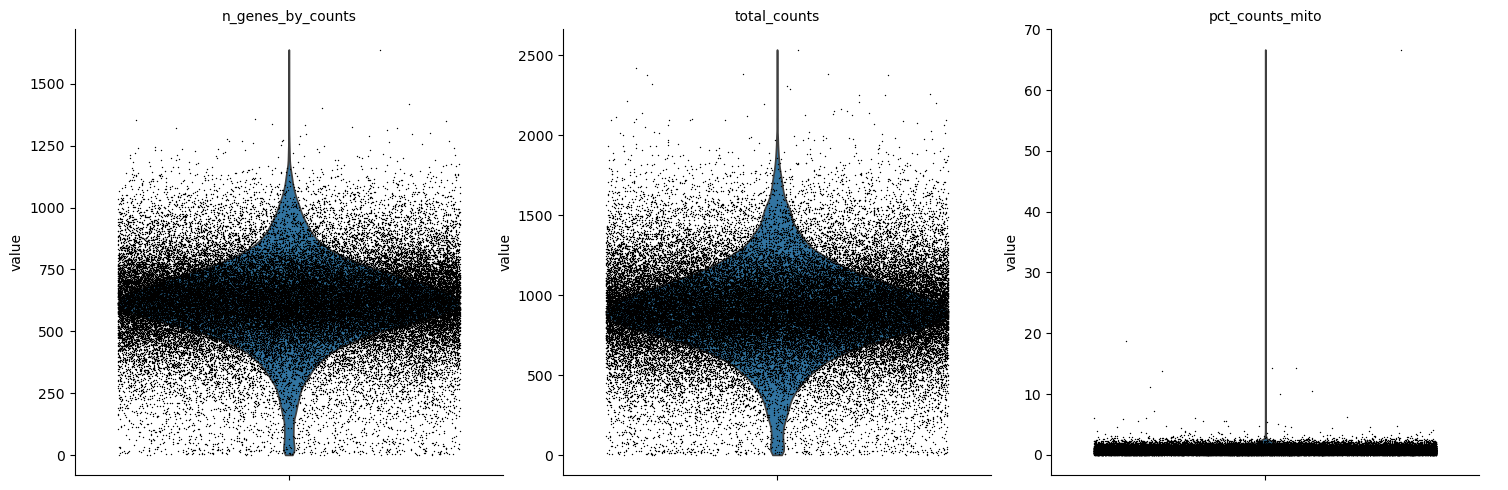

In [14]:
sc.pl.violin(
    hdata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mito"],
    jitter=0.4,
    multi_panel=True,)

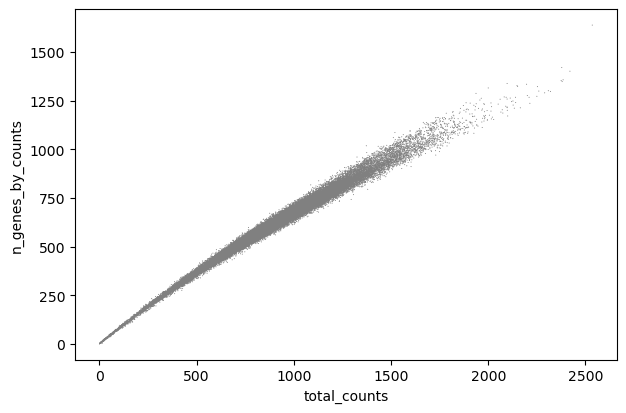

In [15]:
sc.pl.scatter(hdata, "total_counts", "n_genes_by_counts")

### **Filterings**

In [15]:
# Gene names to strings
gene_names = hdata.var_names.astype(str)

# Remove
has_dot = gene_names.str.contains(r'\.', regex=True)
is_NEAT1 = gene_names == 'NEAT1'
is_MALAT1 = gene_names == 'MALAT1'
is_mito = gene_names.str.startswith(('MT-', 'mt-'))
is_ribo = gene_names.str.startswith(('RPS', 'RPL'))

to_remove = has_dot | is_NEAT1 | is_MALAT1 | is_mito | is_ribo

# Invert
genes_to_keep = ~to_remove

# Apply filter
hdata = hdata[:, genes_to_keep].copy()


In [16]:
# Object with filtered 3 last counts that are very high (12465, 14078 and 38476), and spots with minimum counts of 200 and minimum 5 cells with a gene
sc.pp.filter_cells(hdata, min_counts=200)
sc.pp.filter_genes(hdata, min_cells=5)
print(f"cells after filters: {hdata.n_obs}")

cells after filters: 54901


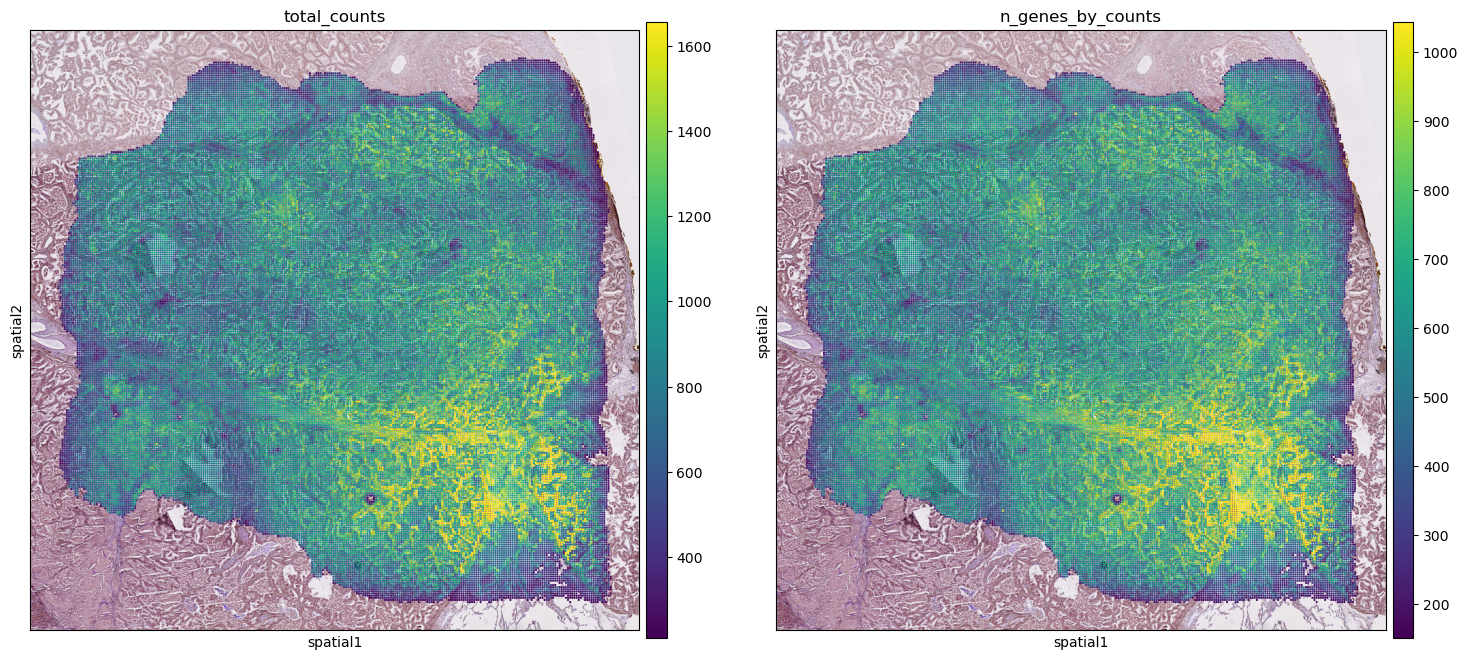

In [18]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(hdata,
              img_key="HeElowRes",
              color=["total_counts", "n_genes_by_counts"],
              vmax='p99',
              #save= "_spatial_B04101E5.png")

### **Normalization**

In [20]:
# Save raw data
adata = hdata.copy()

# Normalizing to median total counts
sc.pp.normalize_total(hdata, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(hdata)

hdata.raw = hdata

### **Feature Selection**

1670


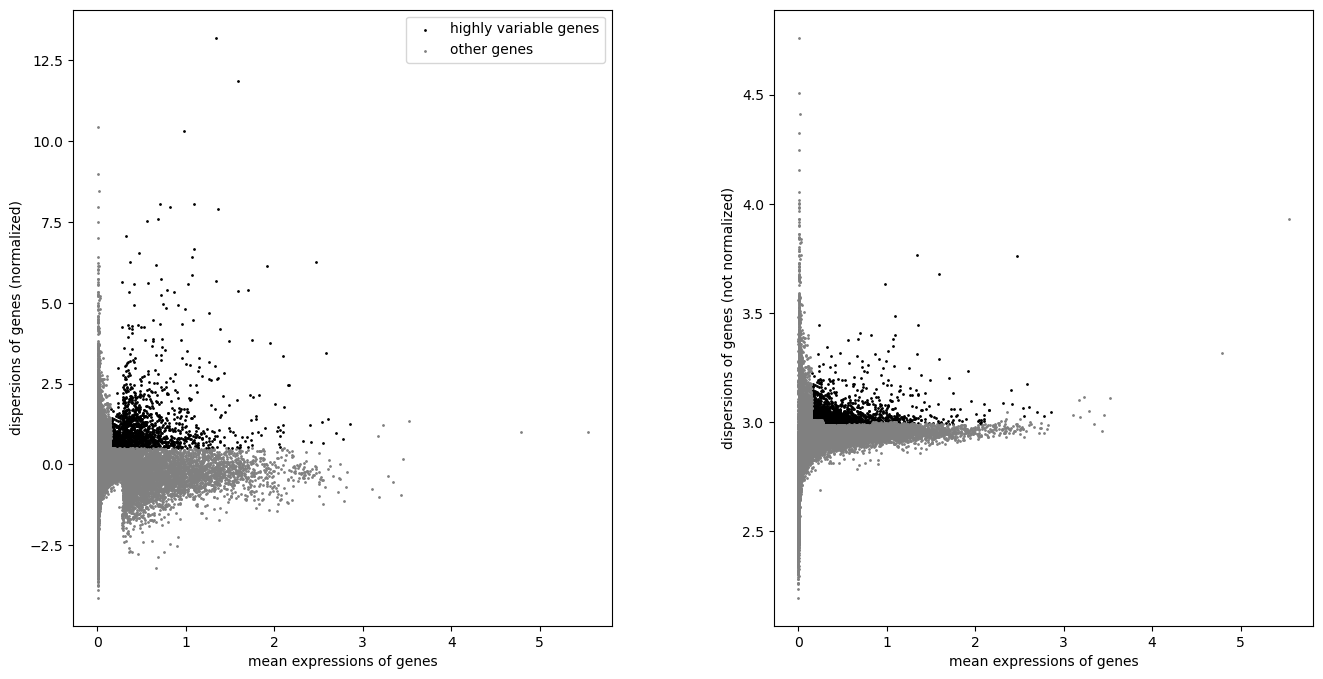

In [21]:
# Select highly variable genes
sc.pp.highly_variable_genes(
    hdata,
    min_mean=0.15,
    max_mean=3,
    min_disp=0.5,
    flavor = 'seurat',
    subset=False)

print(hdata.var['highly_variable'].sum())

# Visualization
sc.pl.highly_variable_genes(hdata, #save= "_hvg_B04101E5.png")

In [22]:
hdata

AnnData object with n_obs × n_vars = 54901 × 19167
    obs: 'orig.ident', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'underTissue', 'keep', 'n_counts'
    var: 'mito', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'binSize', 'bin_size', 'bin_type', 'description', 'orig_var_names', 'resolution', 'sn', 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'

### **Embedding**

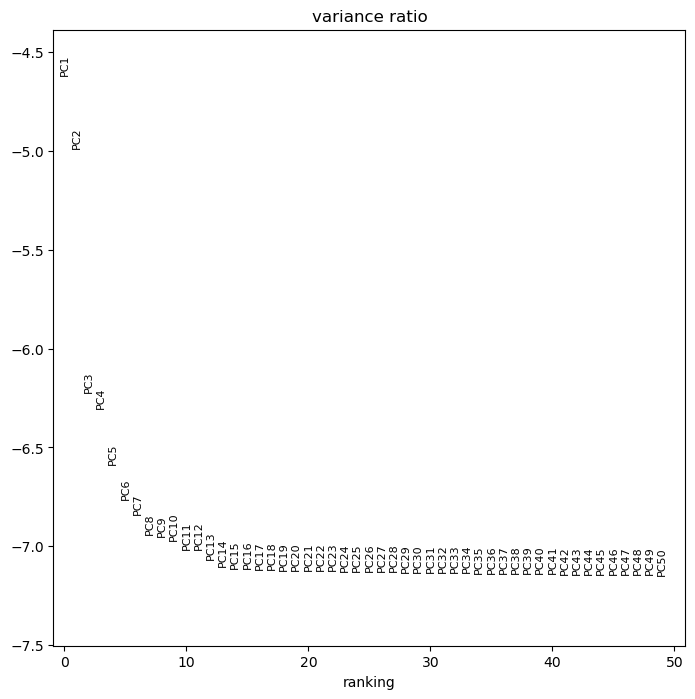

In [23]:
# PCA
sc.pp.scale(hdata)
sc.tl.pca(hdata, n_comps=50) # 50 PCs
sc.pl.pca_variance_ratio(hdata, n_pcs=50, log=True, #save= "_B04101E5.png")

### **Nearest neighbor graph constuction and visualization**

In [24]:
# Neighbors and UMAP
sc.pp.neighbors(hdata, n_pcs=25)
sc.tl.umap(hdata)

### **Clustering**

In [25]:
sc.tl.leiden(hdata, resolution=0.8, key_added='leiden_0.8', random_state=123)

/home/groups/singlecell/cfernandez/miniconda3/envs/stereopy_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


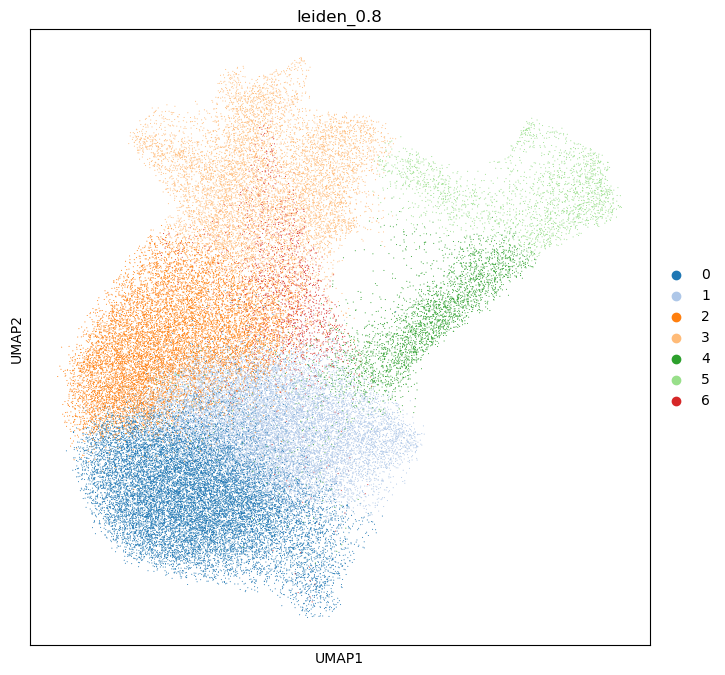

In [26]:
# UMAP plot (for resolution 0.8)
palette = sns.color_palette("tab20", n_colors=20)
sc.pl.umap(hdata, color='leiden_0.8', palette=palette, #save= "_B04101E5.png")

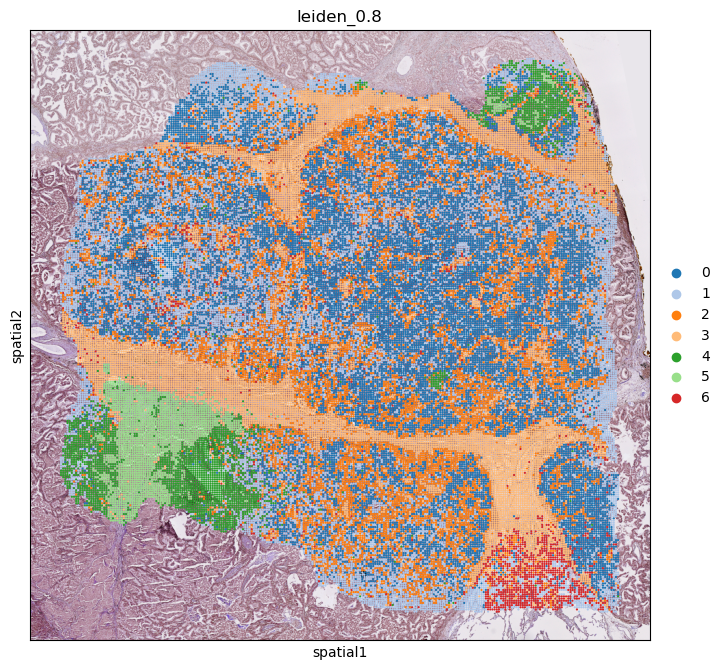

[<Axes: title={'center': 'leiden_0.8'}, xlabel='spatial1', ylabel='spatial2'>]

In [27]:
# Spatial scatter
sc.pl.spatial(
        hdata,
        color='leiden_0.8',
        img_key= 'HeElowRes',
        alpha=1.0,             
        palette=palette,
        return_fig=True,
        #save= "_B04101E5.png")

/home/groups/singlecell/cfernandez/miniconda3/envs/stereopy_env/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/groups/singlecell/cfernandez/miniconda3/envs/stereopy_env/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: UserWarning: The palette list has more values (20) than needed (7), which may not be intended.
  ax = sns.violinplot(
/home/groups/singlecell/cfernandez/miniconda3/envs/stereopy_env/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


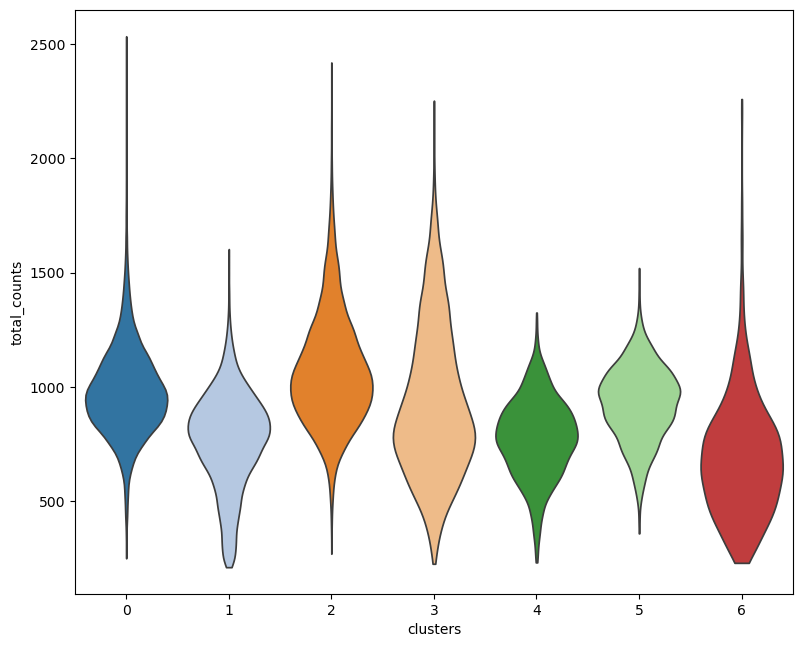

In [28]:
# Violin plot  
sc.pl.violin(
        hdata,
        keys=['total_counts'],  
        groupby= 'leiden_0.8',
        jitter=0.4,
        stripplot=False,
        palette= palette,
        xlabel= 'clusters',
        #save= "_B04101E5.png")

### **Marker Genes**

In [29]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(hdata, 
                            groupby='leiden_0.8', 
                            use_raw=True, 
                            layer=None, 
                            method='wilcoxon', 
                            key_added='rank_genes_leiden_0.8')

/home/groups/singlecell/cfernandez/miniconda3/envs/stereopy_env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


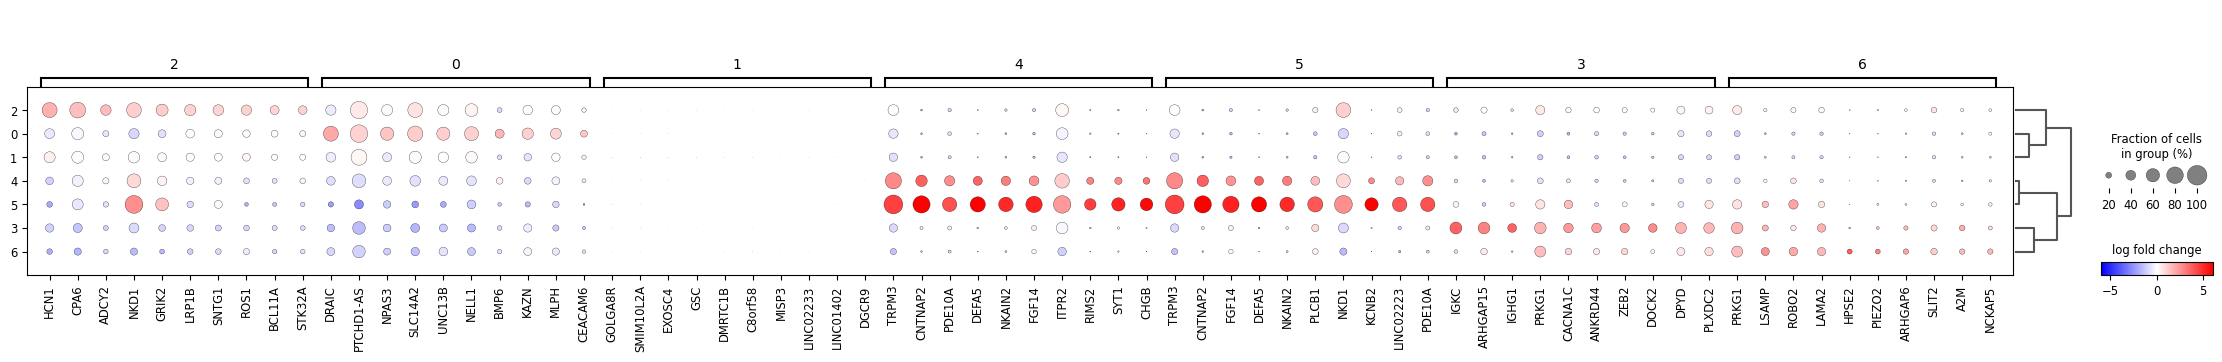

In [30]:
# Dotplot
sc.pl.rank_genes_groups_dotplot(
        hdata,
        key='rank_genes_leiden_0.8',  
        values_to_plot="logfoldchanges",
        groupby='leiden_0.8',
        n_genes=10,
        vmax = 6,
        vmin=-6,
        min_logfoldchange = 1,
        cmap='bwr',
        colorbar_title='log fold change')

/home/groups/singlecell/cfernandez/miniconda3/envs/stereopy_env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


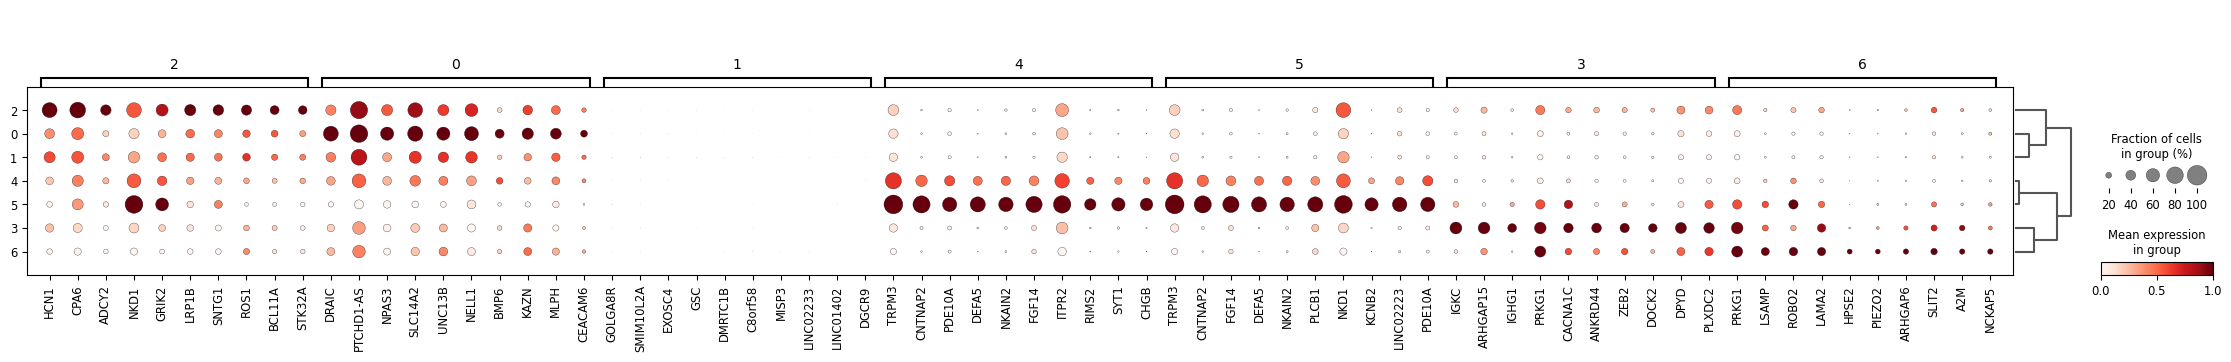

In [31]:
# Dotplot
sc.pl.rank_genes_groups_dotplot(
        hdata,
        key='rank_genes_leiden_0.8',  
        groupby='leiden_0.8',
        n_genes=10,
        min_logfoldchange = 1,
        standard_scale='var',
        #save= "_B04101E5.png")

### **Annotations Spatial Scatter**

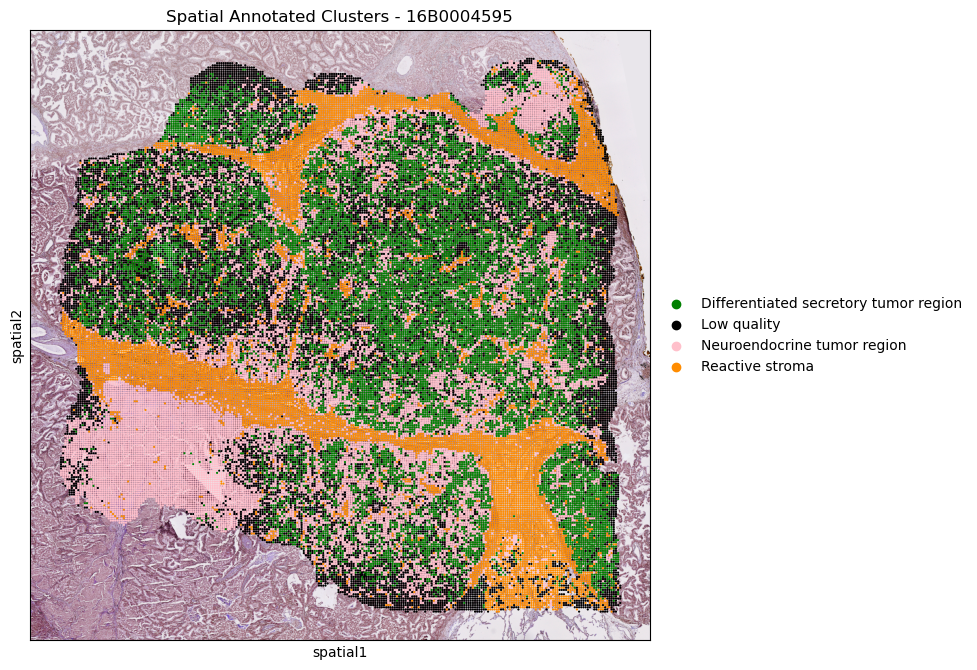

[<Axes: title={'center': 'Spatial Annotated Clusters - 16B0004595'}, xlabel='spatial1', ylabel='spatial2'>]

In [37]:
# Annotations per cluster
cluster_annotations = {
    '0': 'Differentiated secretory tumor region',
    '1': 'Low quality',
    '2': 'Neuroendocrine tumor region',
    '3': 'Reactive stroma',
    '4': 'Neuroendocrine tumor region',
    '5': 'Neuroendocrine tumor region',
    '6': 'Reactive stroma'}

# Custom color palette
annotation_palette = {
    'Low quality': 'black',
    'Neuroendocrine tumor region': 'pink',
    'Reactive stroma': 'darkorange',
    'Normal ciliated respiratory epithelium': 'skyblue',
    'Differentiated secretory tumor region': 'green',
    'Differentiated tumor region': 'red',
    'Invasive front': 'yellow'}

# New column with annotations
hdata.obs['cluster_annot'] = hdata.obs['leiden_0.8'].map(cluster_annotations)

# Plot annotated clustering 
sc.pl.spatial(
    hdata,
    color='cluster_annot',
    img_key='HeElowRes',
    alpha=1.0,
    title='Spatial Annotated Clusters - 16B0004595',
    palette=annotation_palette,
    return_fig=True,
    #save= "_annotated_B04101E5.png")

In [38]:
hdata

AnnData object with n_obs × n_vars = 54901 × 19167
    obs: 'orig.ident', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'underTissue', 'keep', 'n_counts', 'leiden_0.8', 'cluster_annot'
    var: 'mito', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'binSize', 'bin_size', 'bin_type', 'description', 'orig_var_names', 'resolution', 'sn', 'spatial', 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_0.8_colors', 'rank_genes_leiden_0.8', 'dendrogram_leiden_0.8', 'cluster_annot_colors'
    obsm: 'spatial'

In [ ]:
#hdata.write("final_B04101E5_host.h5ad")